# Advanced Clustering

In [1]:
import pandas as pd
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/78/mall_customer_dataset.csv"

urlretrieve(url, "garma_customer_dataset.csv")

garma_customer_dataset = pd.read_csv("garma_customer_dataset.csv",index_col=0)
garma_customer_dataset.head()

,Annual Income ($),Spending Score (1-100)
CustomerID,,
1,15000,39
2,15000,81
3,16000,6
4,16000,77
5,17000,40


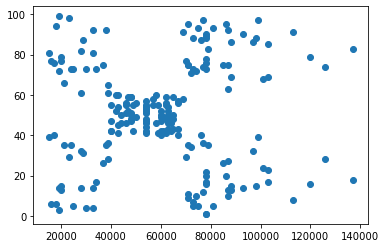

In [2]:
import matplotlib.pyplot as plt
plt.scatter(garma_customer_dataset["Annual Income ($)"],garma_customer_dataset["Spending Score (1-100)"])
plt.show()

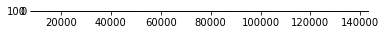

In [3]:
#Before we plot the data we need to import the matplotlib library
import matplotlib.pyplot as plt

#We use the scatter function to create a scatter plot
plt.scatter(garma_customer_dataset["Annual Income ($)"],garma_customer_dataset["Spending Score (1-100)"])
#We use the axis function to ensure that the axes are scaled
#This lets us see the "true" shape of the data
plt.axis("scaled")
plt.show()
#Based on the result below, it looks like there are 4 distinct clusters

#  Preparing Data for Clustering

In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit_transform(garma_customer_dataset)
scaled_dataset = pd.DataFrame(min_max_scaler, columns=garma_customer_dataset.columns)

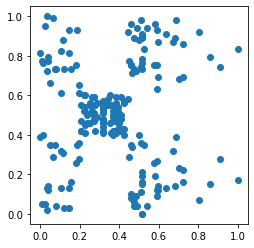

In [5]:
#Before we plot the data we need to import the matplotlib library
import matplotlib.pyplot as plt

#We use the scatter function to create a scatter plot
plt.scatter(scaled_dataset["Annual Income ($)"],scaled_dataset["Spending Score (1-100)"])
#We use the axis function to ensure that the axes are scaled
#This lets us see the "true" shape of the data
plt.axis("scaled")
plt.show()
#Based on the result below, it looks like there are 4 distinct clusters

# Understanding Single Linkage Clustering 

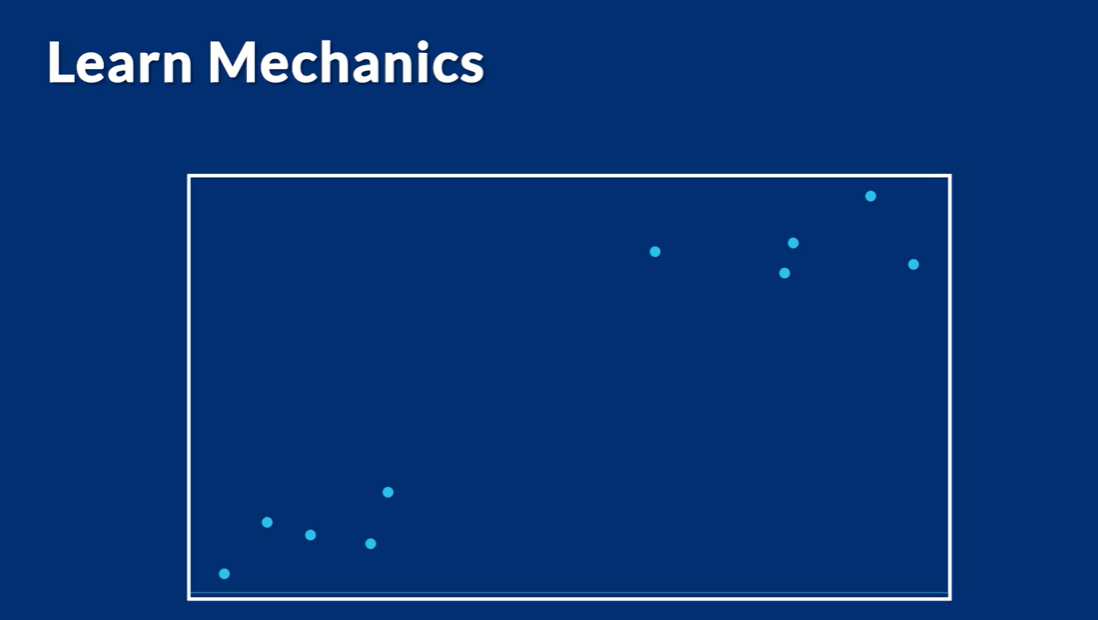

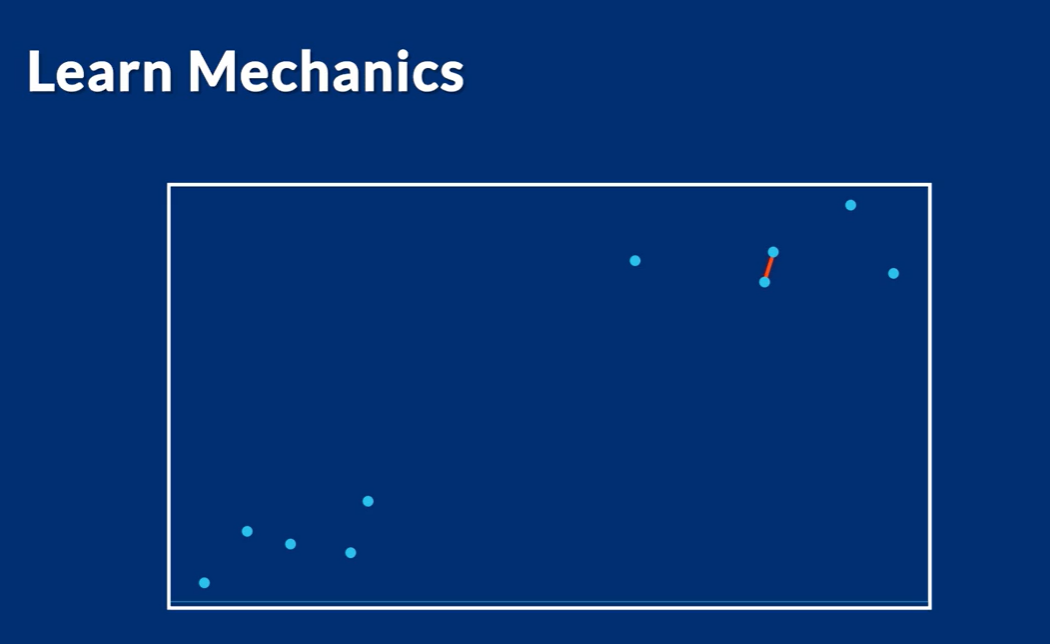

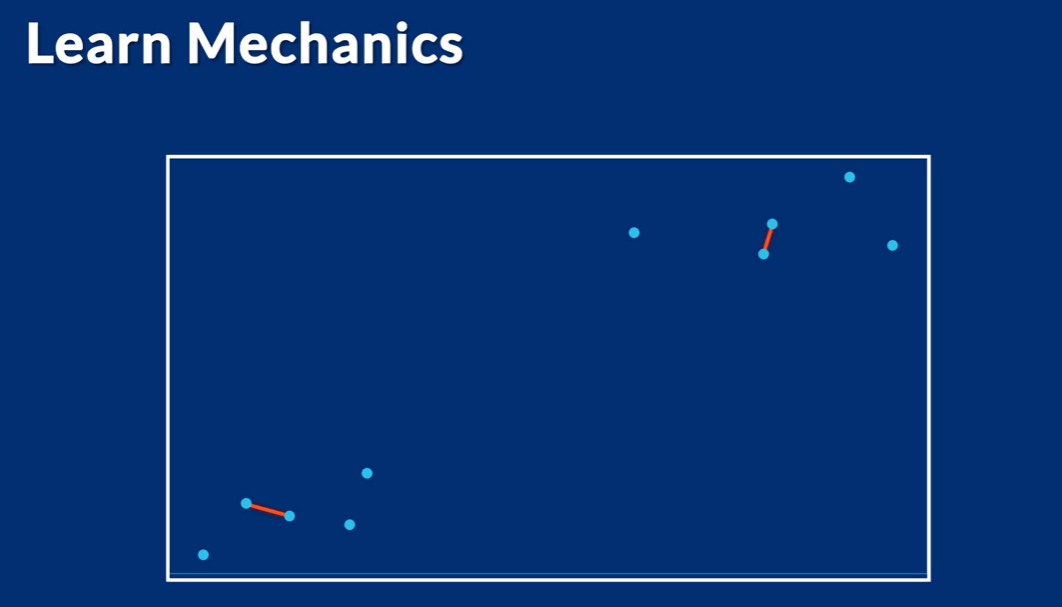

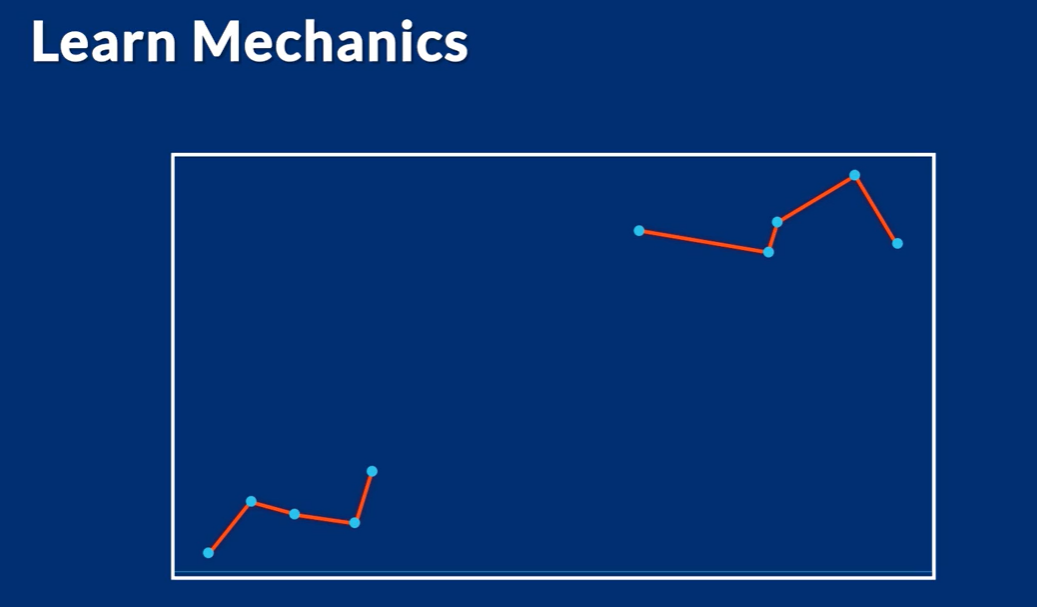

- To start, it looks for the two data points that are closest to each other and connects them.
- It then looks for the next two closest data points and connects these.
- It then repeats this process again and again. Let's watch as it works its way through each data point. The model only stops when it's reached the number of clusters specified by whoever programed the algorithm.

# Exploring Strengths

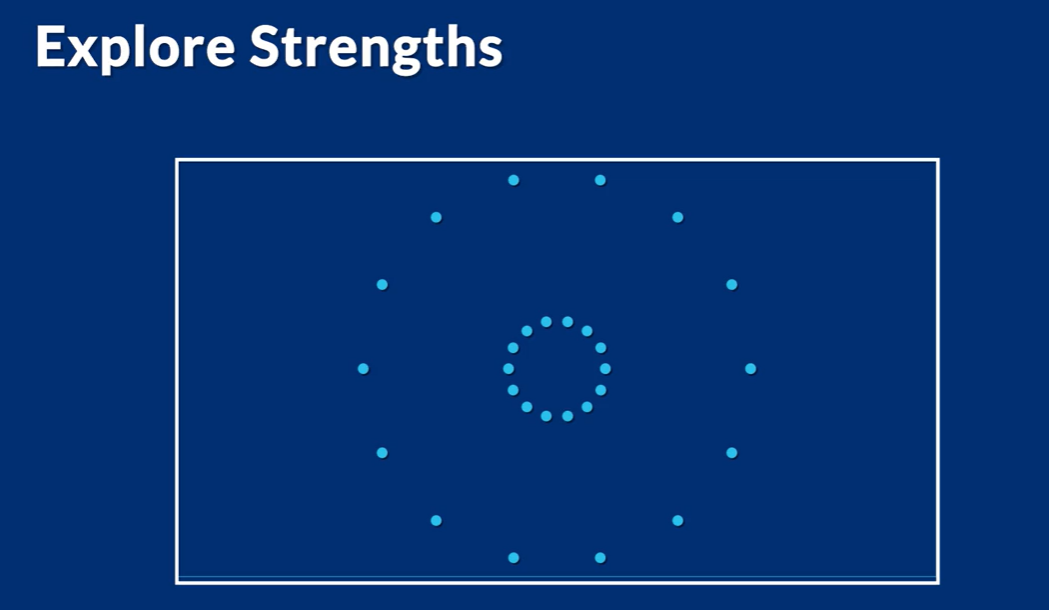

# 1. In case of K-Means Clustering
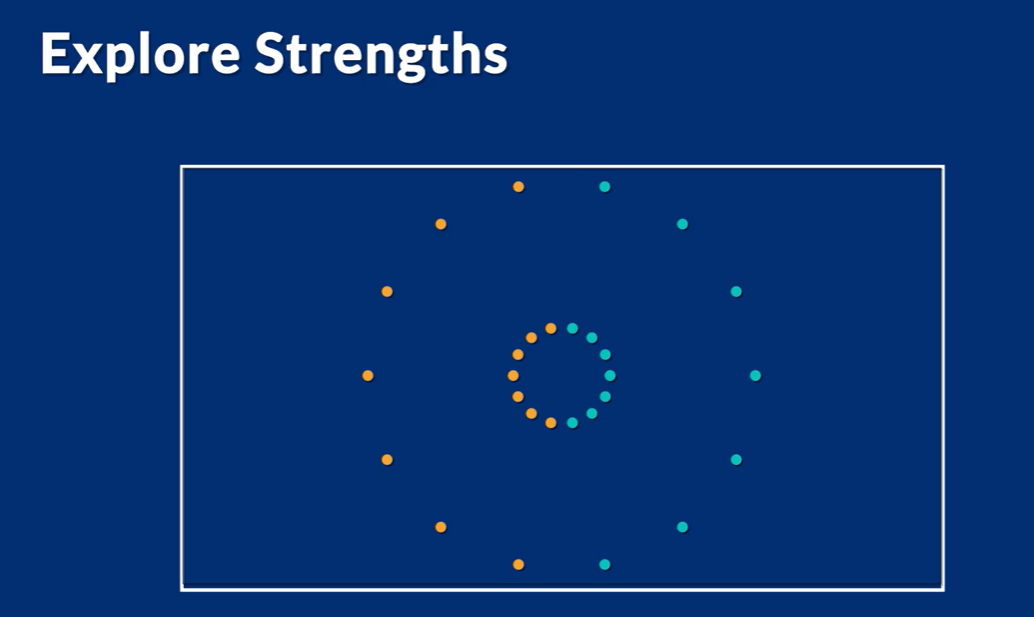

# 2. In Single Linkage Clustering
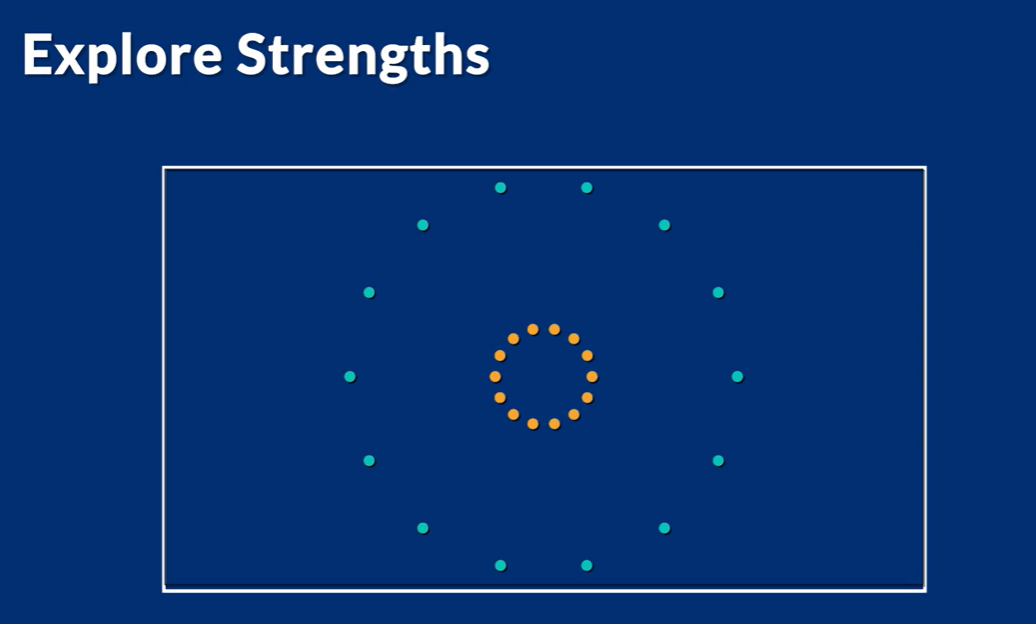

# Exploring Weaknesses

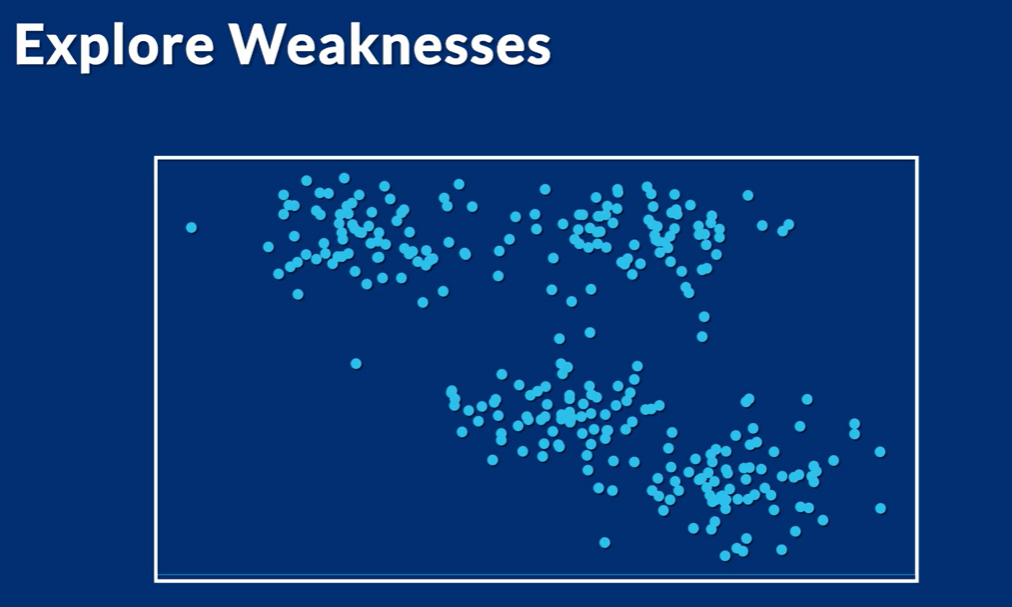

# 1. In case of K-Means Clustering
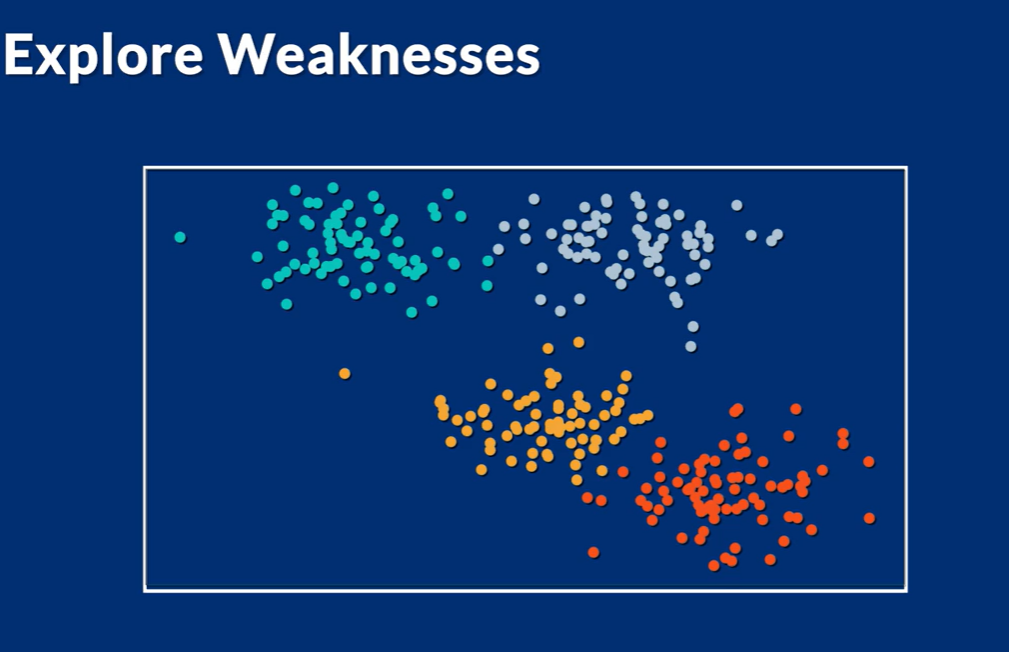

# 2. In Single Linkage Clustering
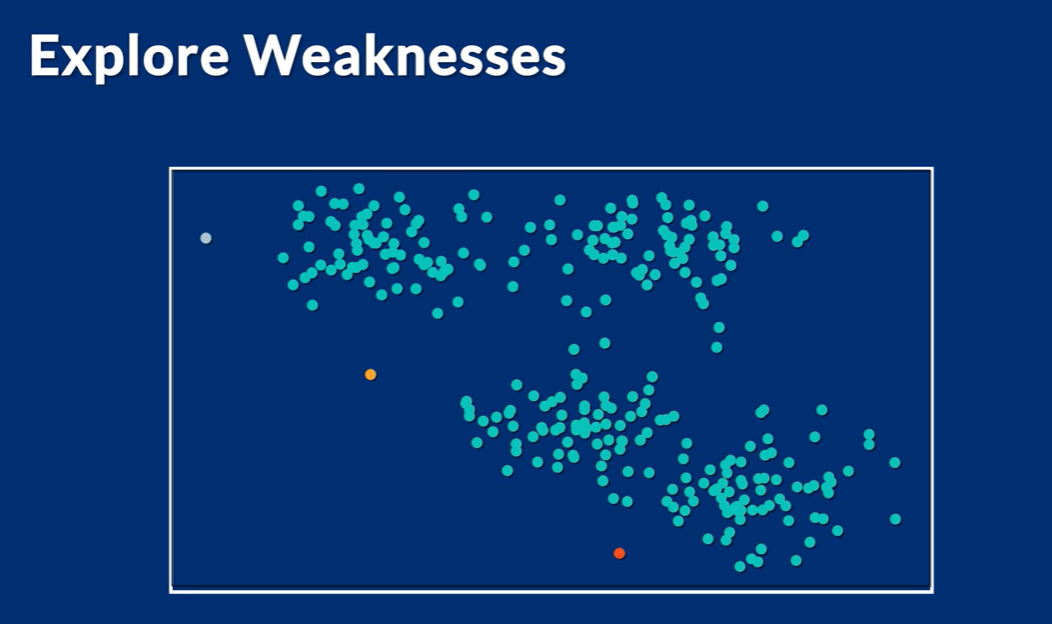

#### Conclusion
- First, we learned the mechanics of single-linkage clustering. We saw that it connects data points one at a time until we have the desired number of clusters.
- Second, we explored the strengths of single-linkage clustering. We saw that when the data is arranged in a certain way it can outperform models such as k-means.
- Third, we explored the weaknesses of single-linkage clustering. Here, we learned that it struggles when the clusters are too close to each other.

# Performing Single Linkage Clustering

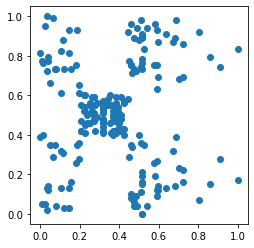

In [6]:
#Before we plot the data we need to import the matplotlib library
import matplotlib.pyplot as plt

#We use the scatter function to create a scatter plot
plt.scatter(scaled_dataset["Annual Income ($)"],scaled_dataset["Spending Score (1-100)"])
#We use the axis function to ensure that the axes are scaled
#This lets us see the "true" shape of the data
plt.axis("scaled")
plt.show()
#Based on the result below, it looks like there are 4 distinct clusters

In [7]:
#Imports the AgglomerativeClustering function
from sklearn.cluster import AgglomerativeClustering

#Stores the AgglomerativeClustering and sets parameters
#n_clusters was set to 5 as it looked like there were 5 clusters in the scatter plot
slc = AgglomerativeClustering(n_clusters=5,linkage='single')
#The cluster variable stores the list of cluster assignments for each data point
cluster = slc.fit_predict(scaled_dataset)

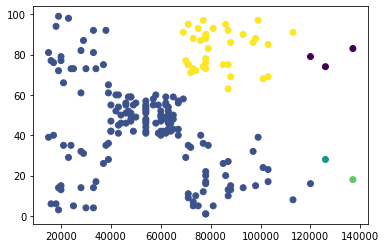

In [8]:
#We use the scatter function again on the original dataset
#This time we set the c variable to match the cluster variable
#This ensures that the color of the data points matches the clusters
plt.scatter(garma_customer_dataset["Annual Income ($)"],garma_customer_dataset["Spending Score (1-100)"],c=cluster)
plt.show()

#### Conclusion
- First, we built the single linkage clustering algorithm in Python. We did this with just a few lines of code.
- Second, we viewed the results. We saw that because some of the clusters are connected by a few stray data points that single linkage clustering failed to accurately identify the clusters.

# Understanding Soft Clustering 

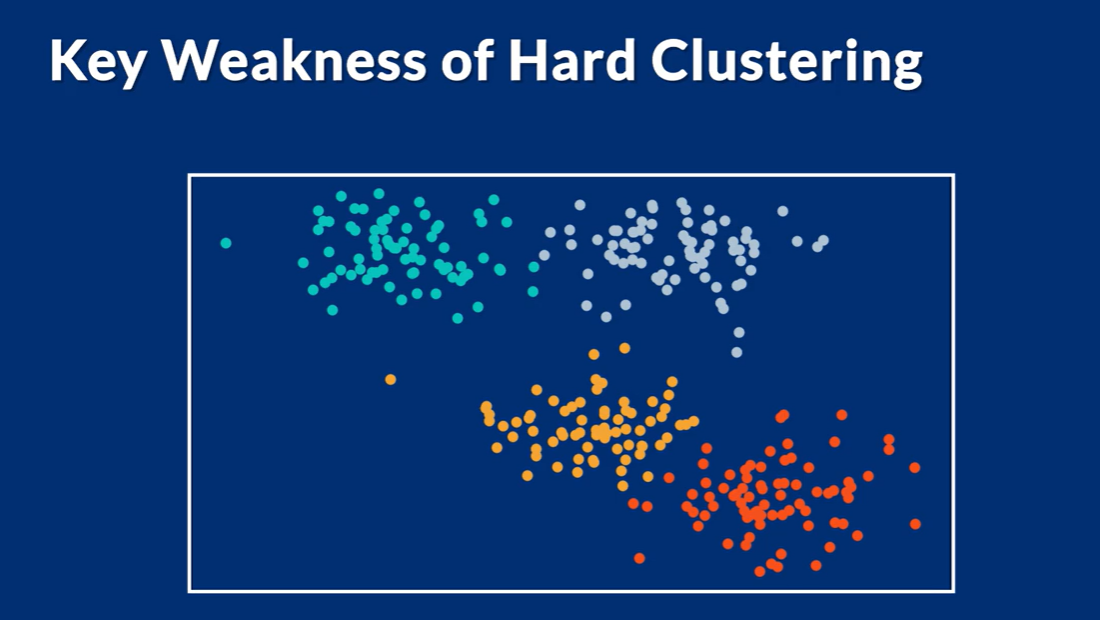

- One flaw with hard clustering algorithms like K-Means is that for datasets where there are values close to more than 1 cluster, it doesn’t convey this information. You just get a single number that tells you the cluster assignment, but you don’t know if that data point was on the periphery of that cluster or near the center.
- This can be problematic for applications, such as in medicine, where it’s important to know which data points are borderline.

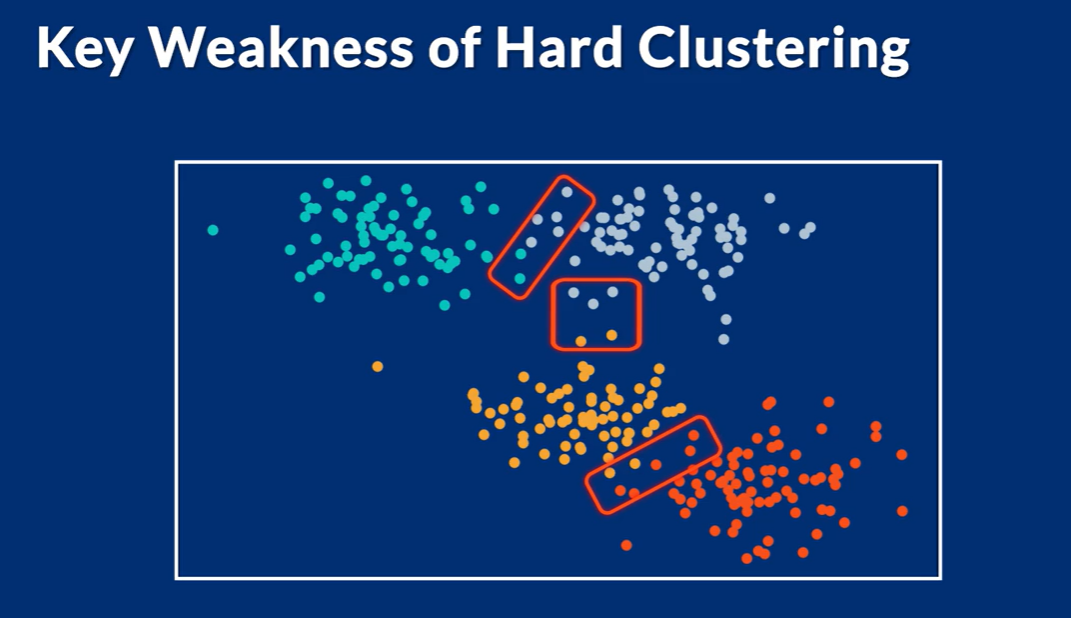

#### How Hard Clustering works
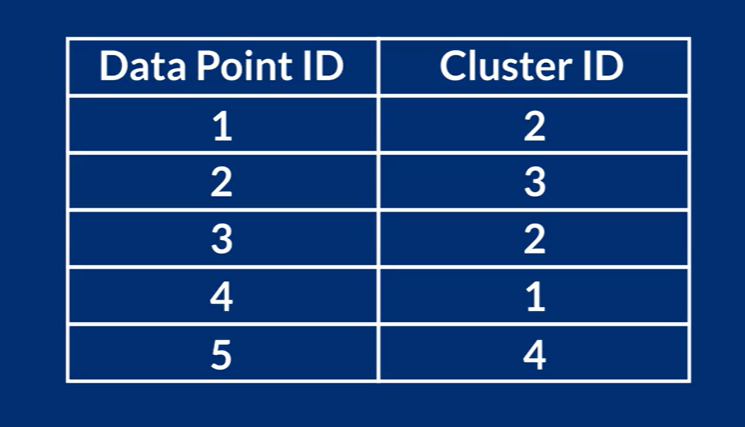

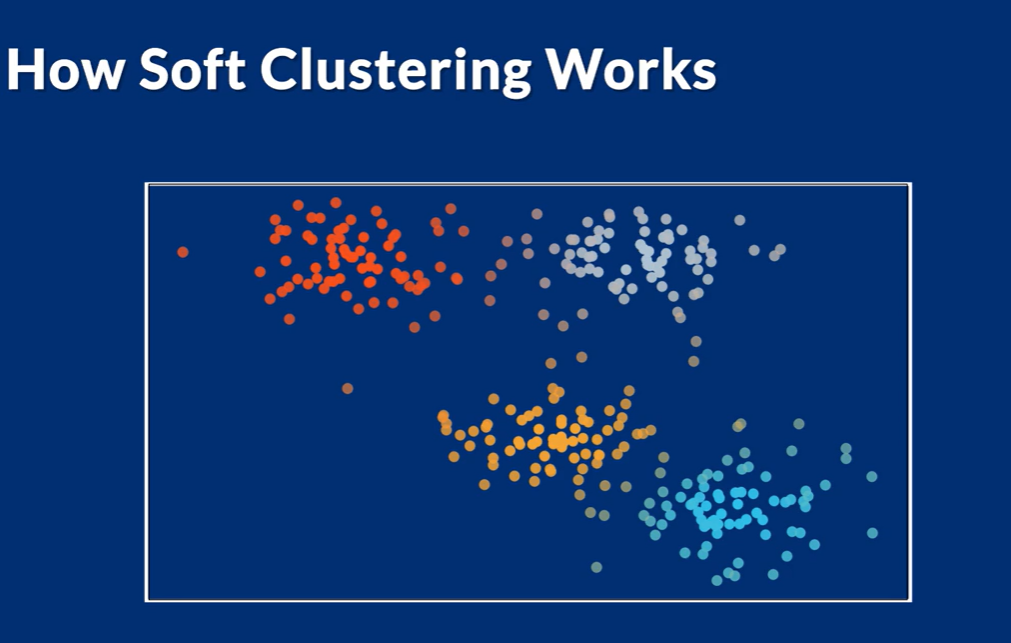

#### How Soft Clustering works
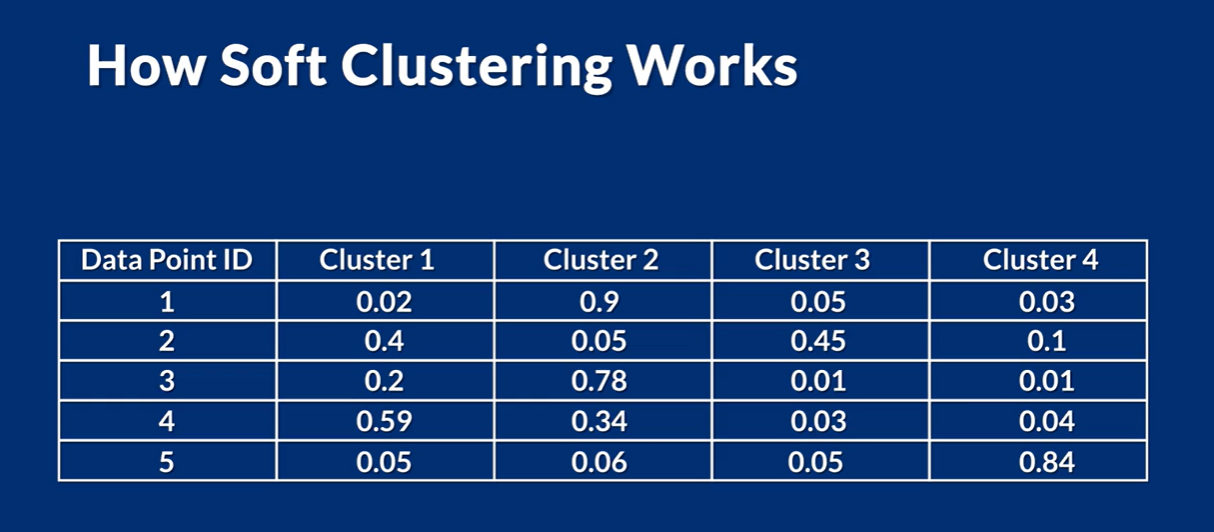

#### Conclusion
- First, we explored a key weakness of hard clustering models, such as k-means clustering. We saw that borderline data points can be almost arbitrarily placed in a cluster without giving us any indication of whether or not the value is borderline.
- Second, we learned how soft clustering works. In the output, we saw that each data point is given a probability that it's contained within each cluster. This lets us see if each data point belongs firmly in a single cluster, or is close to more than one cluster.

# Performing Soft Clustering 

In [9]:
# pip install fuzzy-c-means

In [10]:
#Imports the FCM function
from fcmeans import FCM

#Stores the FCM function in a variable
#Sets the number of clusters to 5
fcm = FCM(n_clusters=5)
fcm.fit(min_max_scaler)

In [11]:
#We use the soft_predict function to create these labeLs
#We need to apply this function to an array
#The min_max_scaler variable contains our data in the array format
fcm_labels = fcm.soft_predict(min_max_scaler)
fcm_labels_df = pd.DataFrame(fcm_labels, columns =["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"])
fcm_labels_df.index = fcm_labels_df.index + 1
fcm_labels_df.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
1,0.477221,0.071733,0.168328,0.053650,0.229068
2,0.020561,0.011469,0.899164,0.027429,0.041377
3,0.836071,0.052611,0.032804,0.019250,0.059263
4,0.018357,0.009763,0.912329,0.021884,0.037668
5,0.450488,0.072150,0.174587,0.054905,0.247870


In [12]:
garma_customer_dataset = pd.concat([garma_customer_dataset, fcm_labels_df], axis =1)
garma_customer_dataset.head()

,Annual Income ($),Spending Score (1-100),Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
1,15000,39,0.477221,0.071733,0.168328,0.053650,0.229068
2,15000,81,0.020561,0.011469,0.899164,0.027429,0.041377
3,16000,6,0.836071,0.052611,0.032804,0.019250,0.059263
4,16000,77,0.018357,0.009763,0.912329,0.021884,0.037668
5,17000,40,0.450488,0.072150,0.174587,0.054905,0.247870


# Evaluating a Soft Clustering Model

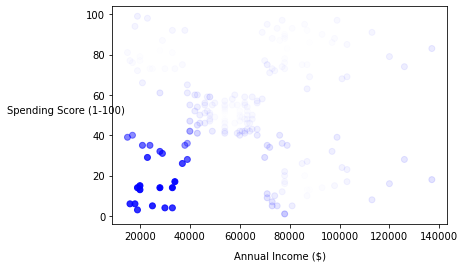

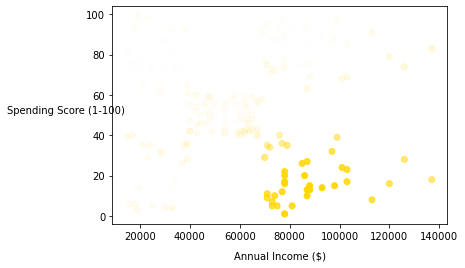

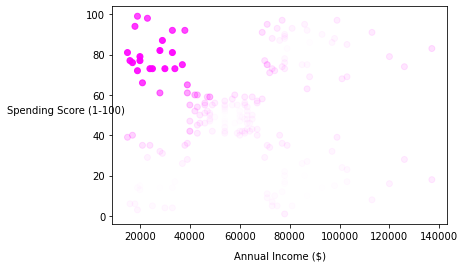

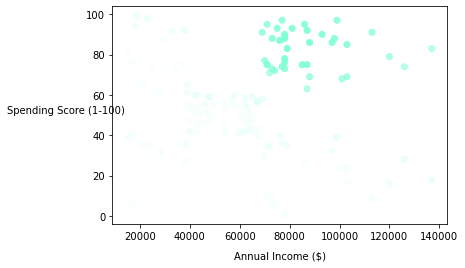

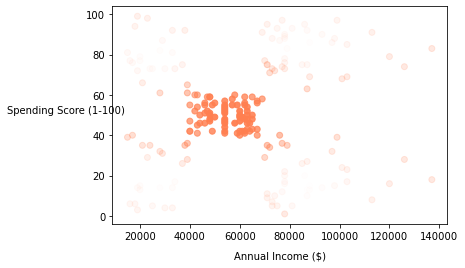

In [13]:
#Imports the functions needed for the custom function to run
from matplotlib.colors import to_rgb, to_rgba

#The function below allows us to create a scatter plot with varying alpha (transparency) for each data point
def alpha_arr_scatter(x, y, color, alpha_arr):
    r, g, b = to_rgb(color)
    # r, g, b, _ = to_rgba(color)
    color = [(r, g, b, alpha) for alpha in alpha_arr]
    plt.scatter(x, y, c=color)

#The variable below lets us specify which colors to use in the outputted charts
colors=["blue","gold","magenta","aquamarine", "coral"]

#Because we need a different scatter plot for each cluster, we need to create a for loop
#This iterates through each cluster and assigns a different color for each one
for i in range(0,5):
    #We start by using the custom function from above
    #We can use the original dataset instead of the scaled one
    alpha_arr_scatter(garma_customer_dataset["Annual Income ($)"],garma_customer_dataset["Spending Score (1-100)"]
                #We set the c argument to iterate through the colors variable so we have a different color for each chart
                ,color=colors[i]
                #We set the alpha_arr to iterate through the columns in the fcm_labels array
                ,alpha_arr=fcm_labels[:,i])
    plt.xlabel("Annual Income ($)",labelpad=10)    
    plt.ylabel("Spending Score (1-100)", rotation=0,labelpad=20)
    plt.show()
#As we can see, soft clustering isn't working well here
#It seems to be placing most values into the same cluster
#It looks like SLC was a better match for this dataset